In [96]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [97]:
df=pd.read_csv('../data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [69]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

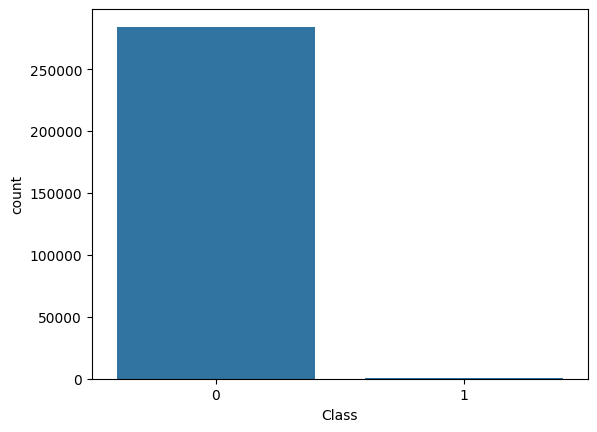

In [71]:
sns.countplot(x='Class', data=df)

<Axes: xlabel='Amount', ylabel='Count'>

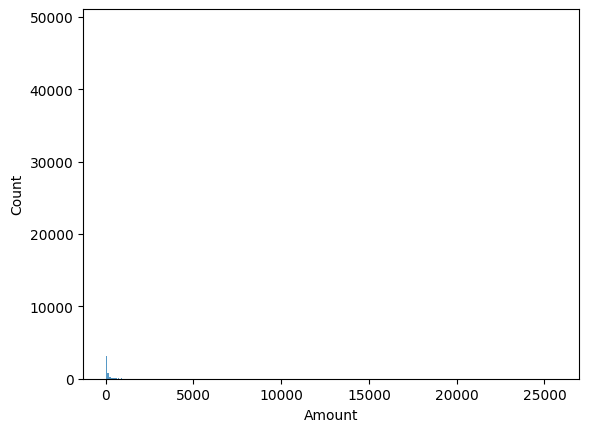

In [72]:
sns.histplot(df['Amount'])

<Axes: xlabel='Time', ylabel='Count'>

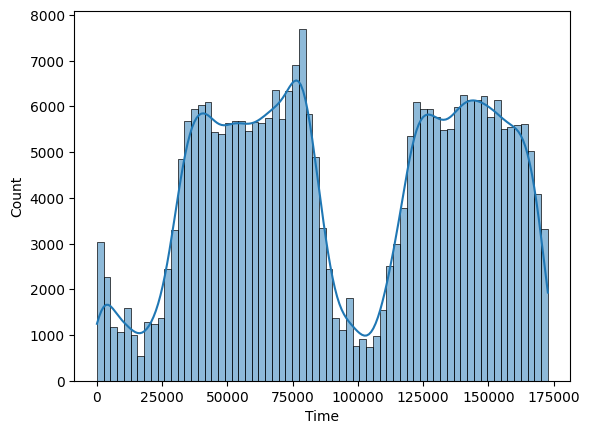

In [73]:
sns.histplot(df['Time'], kde=True)

In [74]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [75]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653,1.034951
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986,1.034963
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096,1.034975
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680,1.034975


In [76]:
X = df.drop('Class', axis=1)
y = df['Class']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)


In [78]:
smote=SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [79]:
y_train_resampled.value_counts()

Class
0    199020
1    199020
Name: count, dtype: int64

<Axes: >

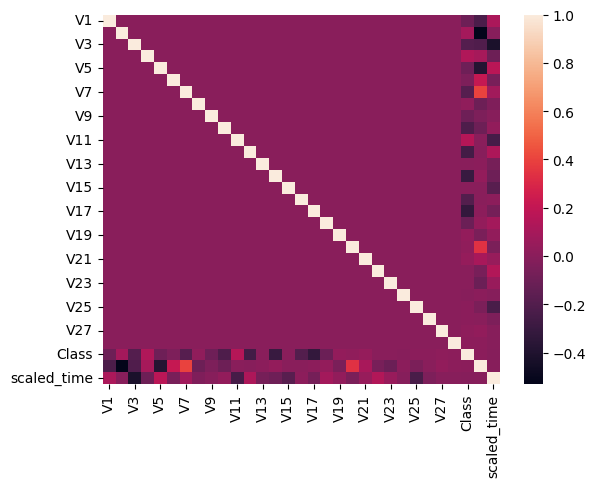

In [80]:
corr=df.corr()
sns.heatmap(corr)

In [43]:
model=RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [45]:
pred=model.predict(X_test)

In [46]:
roc_auc_score(y_test, pred)

np.float64(0.8783373443201099)

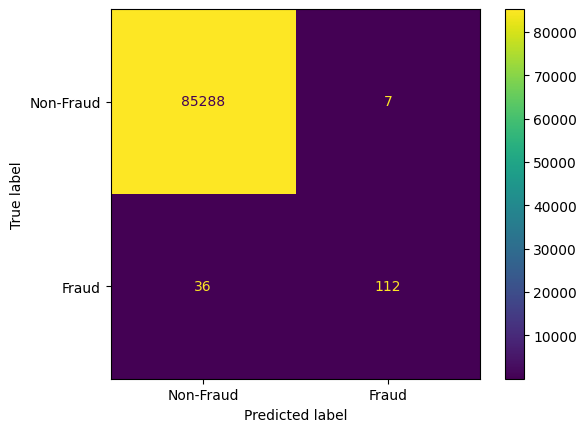

In [51]:
cm=confusion_matrix(y_test, pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Fraud','Fraud'])
disp.plot() 

In [52]:
model=AdaBoostClassifier()
model.fit(X_train_resampled, y_train_resampled) 

AdaBoostClassifier()

In [53]:
pred=model.predict(X_test)

In [54]:
roc_auc_score(y_test, pred)

np.float64(0.9170486610063959)

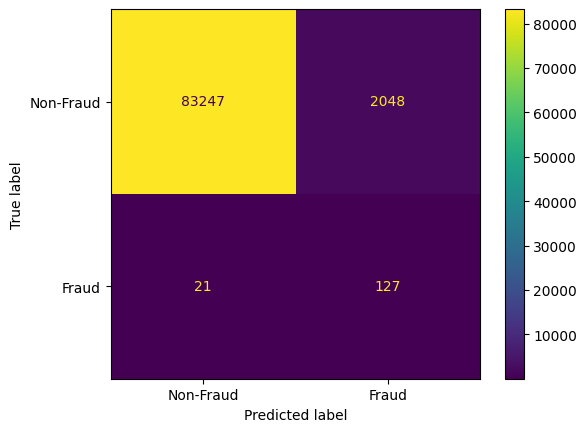

In [55]:
cm=confusion_matrix(y_test, pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Fraud','Fraud'])
disp.plot() 

#### Neural Network

In [82]:
n_inputs=X_train_resampled.shape[1]
model=Sequential([
    Dense(n_inputs,input_shape=(n_inputs,),activation='relu'),
    Dense(64,activation='relu'),
    Dense(2,activation='softmax')
])

/Users/akashmukherjee/Programming/Practise ML/Credit Card/my_Env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,044 (11.89 KB)

 Trainable params: 3,044 (11.89 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.compile(Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [85]:
model.fit(X_train_resampled, y_train_resampled, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
12738/12738 - 7s - 579us/step - accuracy: 0.9729 - loss: 0.0722 - val_accuracy: 0.9877 - val_loss: 0.0388
Epoch 2/20
12738/12738 - 7s - 540us/step - accuracy: 0.9945 - loss: 0.0216 - val_accuracy: 0.9980 - val_loss: 0.0189
Epoch 3/20
12738/12738 - 7s - 544us/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 0.9998 - val_loss: 0.0076
Epoch 4/20
12738/12738 - 7s - 548us/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9997 - val_loss: 0.0064
Epoch 5/20
12738/12738 - 7s - 526us/step - accuracy: 0.9988 - loss: 0.0061 - val_accuracy: 0.9998 - val_loss: 0.0059
Epoch 6/20
12738/12738 - 7s - 524us/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 0.9999 - val_loss: 0.0048
Epoch 7/20
12738/12738 - 7s - 527us/step - accuracy: 0.9992 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/20
12738/12738 - 7s - 526us/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 9/20
12738/12738 - 7s - 521us/step - accuracy: 0.9994 - lo

In [92]:
pred=model.predict(X_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step


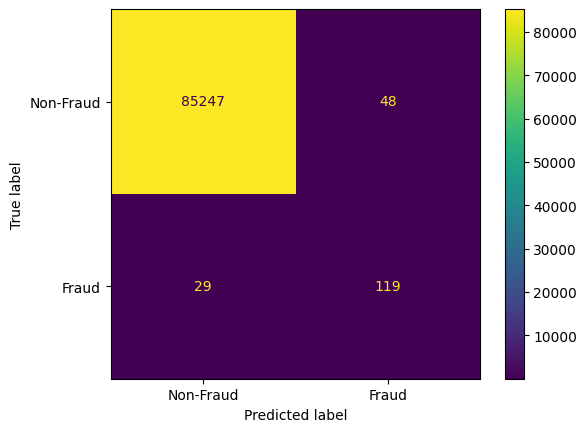

In [95]:
cm=confusion_matrix(y_test, np.argmax(pred,axis=-1))
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Non-Fraud','Fraud'])
disp.plot() 